<a href="https://colab.research.google.com/github/realpranav93/EIP4/blob/master/session2/EIP4_asssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title
# https://keras.io/
!pip install -q keras
import keras

In [0]:
#@title
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [4]:
#@title
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


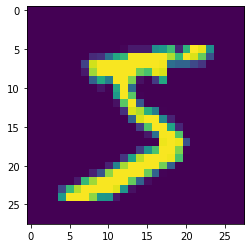

In [5]:
#@title
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#@title
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#@title
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
#@title
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
#@title
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
#@title
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler

model2 = Sequential()

model2.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1),use_bias = False)) #26
model2.add(BatchNormalization())
model2.add(Convolution2D(18, 3, activation='relu',use_bias = False)) #24
model2.add(BatchNormalization())
model2.add(Convolution2D(18, 3, activation='relu',use_bias = False)) #22
model2.add(BatchNormalization())
model2.add(Dropout(0.20))

model2.add(MaxPooling2D(pool_size=(2, 2))) #11
model2.add(Convolution2D(10,1, activation='relu',use_bias = False)) #11
model2.add(BatchNormalization())
model2.add(Convolution2D(16, 3, activation='relu',use_bias = False)) #9
model2.add(BatchNormalization())
model2.add(Convolution2D(18, 3, activation='relu',use_bias = False)) #7
model2.add(Dropout(0.20))

model2.add(BatchNormalization())
model2.add(Convolution2D(10,1, activation='relu',use_bias = False))#7
model2.add(BatchNormalization())
model2.add(Convolution2D(10,7)) #1




model2.add(Flatten())
model2.add(Activation('softmax'))
model2.summary()


def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model2.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])


model2.fit(X_train, Y_train, batch_size=128,epochs=20, verbose=1,validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)] )
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias=False)`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 18)        1620      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 18)        72        
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 18)        2916      
_________________________________________________________________
batch_normalization_10 (Batc (None, 22, 22, 18)        72        
_________________________________________________________________
dropout_3 (Dropout)          (None, 22, 22, 18)       